In [1]:
import pandas as pd
import numpy as np
import os
from nice_funcs.indicators import EWMA,Normalize,MACD

In [2]:
path_diario = './assets/1d/'
ativos = os.listdir(path_diario)

In [3]:
ativosOHLC = {}
for ativo in ativos:
    ativosOHLC[ativo.replace('.xlsx','')] = \
        pd.read_excel(os.path.join(path_diario,ativo),index_col=0)
    

In [4]:
close_prices = {}
for k in ativosOHLC.keys():
  close_prices[k] = ativosOHLC[k].Close


In [5]:
df_fechamento = pd.DataFrame(close_prices)
df_fechamento_normalized = df_fechamento.apply(lambda row: Normalize(row))

In [6]:
df_fechamento_normalized['ADAUSDT']

Date
2018-05-04   -0.211945
2018-05-05   -0.200500
2018-05-06   -0.230628
2018-05-07   -0.256842
2018-05-08   -0.270422
                ...   
2023-07-31   -0.295088
2023-08-01   -0.289708
2023-08-02   -0.307641
2023-08-03   -0.319216
2023-08-04   -0.316771
Name: ADAUSDT, Length: 1919, dtype: float64

In [7]:
x,y,z = MACD(df_fechamento['BTCUSDT'])

<Axes: xlabel='Date'>

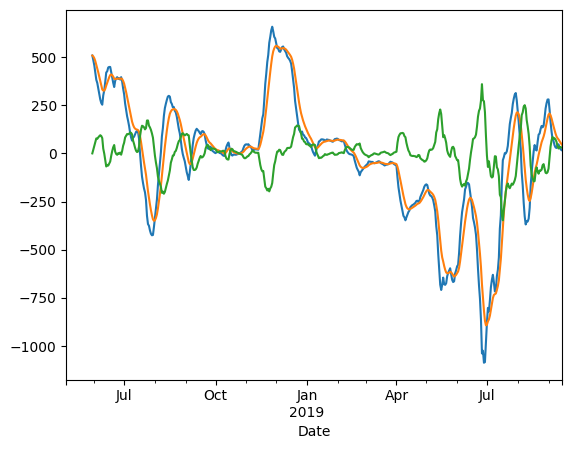

In [12]:
x.head(500).plot()
y.head(500).plot()
z.head(500).plot()

<Axes: xlabel='Date'>

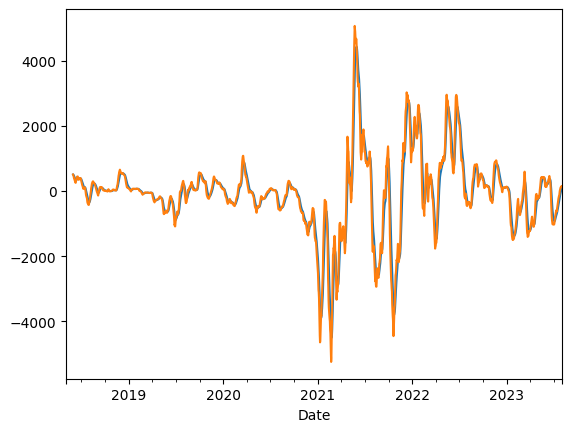

In [8]:
y.plot()
x.plot()

In [6]:
df_fechamento_normalized_ewma_5 = df_fechamento_normalized.apply(lambda row: EWMA(row,5))
df_fechamento_normalized_ewma_20 = df_fechamento_normalized.apply(lambda row: EWMA(row,20))

diff_ewma20_ewma5 = (df_fechamento_normalized_ewma_20 - df_fechamento_normalized_ewma_5)

In [7]:
df_fechamento_normalized.iloc[-1]

ADAUSDT   -0.316771
BNBUSDT    0.364773
BTCUSDT    0.459313
ETHUSDT    0.506304
LTCUSDT   -0.185105
XRPUSDT    0.656200
Name: 2023-08-04 00:00:00, dtype: float64

<Axes: xlabel='Date'>

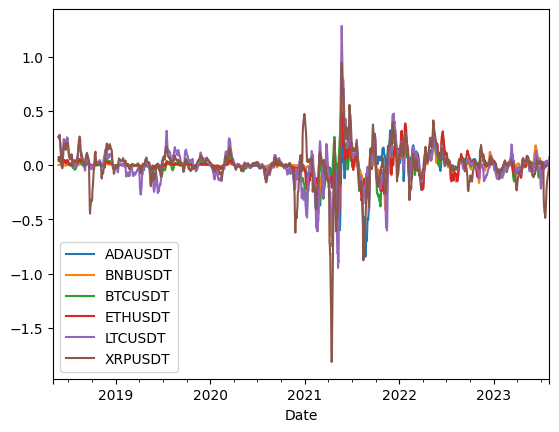

In [8]:
diff_ewma20_ewma5.plot()